## 1. Importing libraries

In [200]:
import warnings
warnings.filterwarnings('ignore')

# For data manipulation
import numpy as np
import pandas as pd 

# For Data Visualization
%matplotlib inline
import seaborn as sns
sns.set_palette("Set2")

import matplotlib.pyplot as plt 

# Machine Learning
from sklearn.svm import SVC
from sklearn import neighbors
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

## 2. Loading Data

In [120]:
data = pd.read_csv('heart.csv')
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [121]:
data.shape

(918, 12)

In [122]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


**There is no missing values**

## 3. Analysis and Visualization

In [123]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


### 1. Heart Disease

In [124]:
data['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

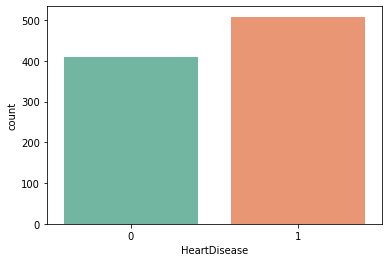

In [125]:
sns.countplot(data['HeartDisease'])

### 2. Age

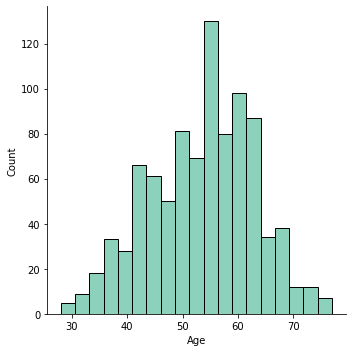

In [126]:
sns.displot(data['Age'])

**Most patients ages between 50 and 65** 

Now I will convert age into groups and study each group separately and the effect of it.

In [127]:
# Convert Age to groups
groups = ['20-35', '35-50', '50-65', '65-80']
for i in range(20, 80, 15):
    data.loc[ (data['Age'] >= i) & (data['Age'] <= i+15) , 'Age_group' ] = groups[0]
    groups.pop(0)

data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Age_group
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,35-50
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,35-50
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,35-50
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,35-50
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,50-65


In [128]:
data['Age_group'].value_counts()

50-65    524
35-50    270
65-80    103
20-35     21
Name: Age_group, dtype: int64

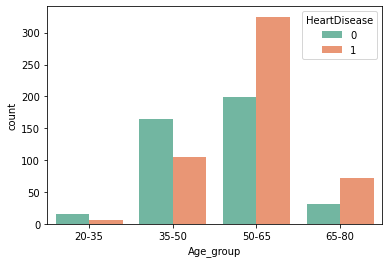

In [129]:
groups = ['20-35', '35-50', '50-65', '65-80']
sns.countplot(data['Age_group'], hue=data['HeartDisease'], order = groups)

Most patient in between 50-65 and 65-80 have a heart disease

### 3. Sex

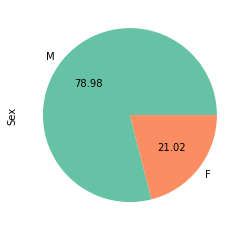

In [130]:
data['Sex'].value_counts().plot(kind="pie", autopct="%.2f")

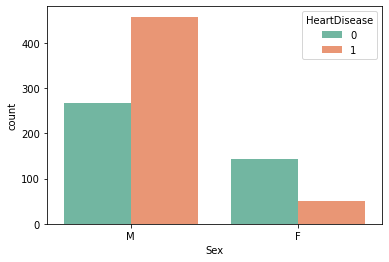

In [131]:
sns.countplot(data['Sex'], hue=data['HeartDisease'])

Most of the patients are male and most of them have heart disease, unlike females

### 4. ChestPainType

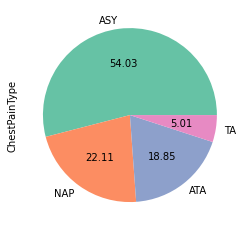

In [132]:
data['ChestPainType'].value_counts().plot(kind="pie", autopct="%.2f")


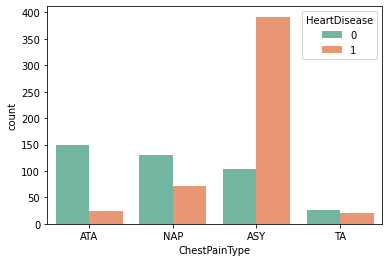

In [133]:
sns.countplot(data['ChestPainType'], hue=data['HeartDisease'])

Most Patient with cheast paint ASY have heart disease 

### 5. RestingBP	and Cholesterol

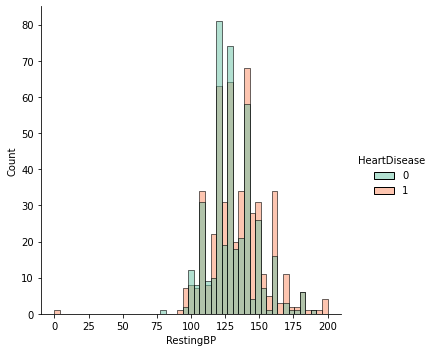

In [134]:
sns.displot(data=data,x='RestingBP', hue='HeartDisease', fill=True)

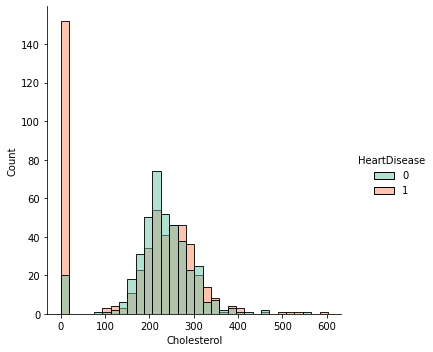

In [135]:
sns.displot(data=data,x='Cholesterol', hue='HeartDisease', fill=True)

### 6. FastingBS

In [136]:
data['FastingBS'].value_counts()

0    704
1    214
Name: FastingBS, dtype: int64

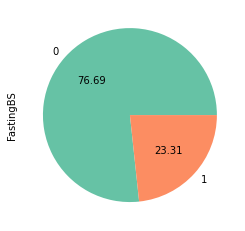

In [137]:
data['FastingBS'].value_counts().plot(kind="pie", autopct="%.2f")

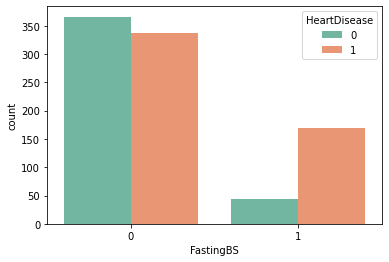

In [138]:
sns.countplot(data['FastingBS'], hue=data['HeartDisease'])

### 7. RestingECG

In [139]:
data['RestingECG'].value_counts()

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64

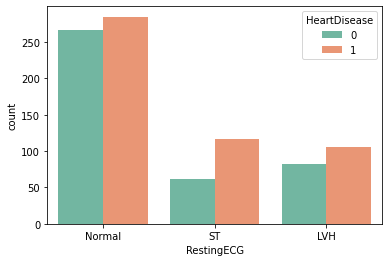

In [140]:
sns.countplot(data['RestingECG'], hue=data['HeartDisease'])

### 8. MaxHR

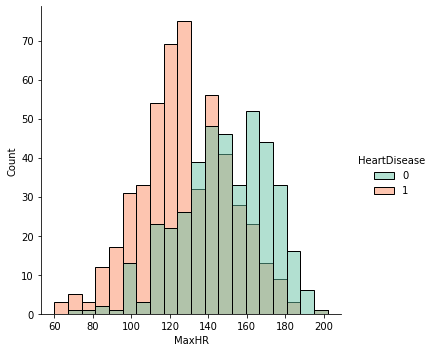

In [141]:
sns.displot(data=data,x='MaxHR', hue='HeartDisease', fill=True)

### 9. ExerciseAngina

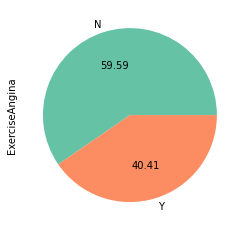

In [142]:
data['ExerciseAngina'].value_counts().plot(kind="pie", autopct="%.2f")

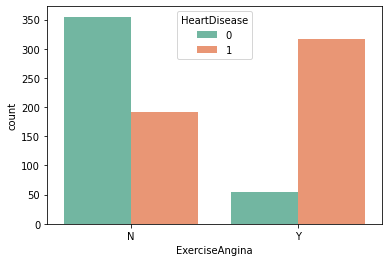

In [143]:
sns.countplot(data['ExerciseAngina'], hue=data['HeartDisease'])

### 10. Oldpeak

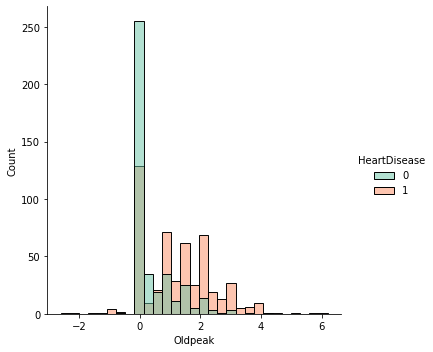

In [144]:
sns.displot(data=data,x='Oldpeak', hue='HeartDisease', fill=True)

### 11. ST_Slope

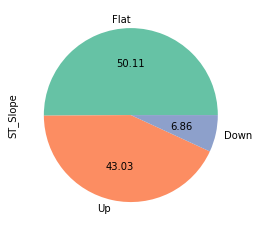

In [145]:
data['ST_Slope'].value_counts().plot(kind="pie", autopct="%.2f")

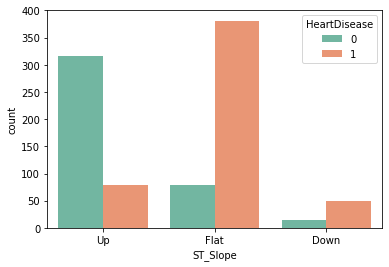

In [146]:
sns.countplot(data['ST_Slope'], hue=data['HeartDisease'])

## 4. Modeling

### 1. Data Preprocessing

In [147]:
data['Sex'].loc[ data['Sex'] == 'F' ] = 0
data['Sex'].loc[ data['Sex'] == 'M' ] = 1
data['Sex'] = data['Sex'].astype(int)
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Age_group
0,40,1,ATA,140,289,0,Normal,172,N,0.0,Up,0,35-50
1,49,0,NAP,160,180,0,Normal,156,N,1.0,Flat,1,35-50
2,37,1,ATA,130,283,0,ST,98,N,0.0,Up,0,35-50
3,48,0,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,35-50
4,54,1,NAP,150,195,0,Normal,122,N,0.0,Up,0,50-65


In [148]:
hot_encoder = pd.get_dummies(data[['ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'Age_group']])
data = data.join(hot_encoder)
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Age_group,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,Age_group_20-35,Age_group_35-50,Age_group_50-65,Age_group_65-80
0,40,1,ATA,140,289,0,Normal,172,N,0.0,Up,0,35-50,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0
1,49,0,NAP,160,180,0,Normal,156,N,1.0,Flat,1,35-50,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0
2,37,1,ATA,130,283,0,ST,98,N,0.0,Up,0,35-50,0,1,0,0,0,0,1,1,0,0,0,1,0,1,0,0
3,48,0,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,35-50,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0
4,54,1,NAP,150,195,0,Normal,122,N,0.0,Up,0,50-65,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,TA,110,264,0,Normal,132,N,1.2,Flat,1,35-50,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0
914,68,1,ASY,144,193,1,Normal,141,N,3.4,Flat,1,65-80,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1
915,57,1,ASY,130,131,0,Normal,115,Y,1.2,Flat,1,50-65,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0
916,57,0,ATA,130,236,0,LVH,174,N,0.0,Flat,1,50-65,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0


In [149]:
# Drop columns
data.drop(['Age', 'Age_group', 'ChestPainType', 'ChestPainType', 'ExerciseAngina', 'RestingECG', 'ST_Slope', 'Age_group', 'ChestPainType_TA', 'RestingECG_ST', 'ExerciseAngina_Y', 'ST_Slope_Up','Age_group_65-80'], axis = 1, inplace = True)
data


,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,RestingECG_LVH,RestingECG_Normal,ExerciseAngina_N,ST_Slope_Down,ST_Slope_Flat,Age_group_20-35,Age_group_35-50,Age_group_50-65
0,1,140,289,0,172,0.0,0,0,1,0,0,1,1,0,0,0,1,0
1,0,160,180,0,156,1.0,1,0,0,1,0,1,1,0,1,0,1,0
2,1,130,283,0,98,0.0,0,0,1,0,0,0,1,0,0,0,1,0
3,0,138,214,0,108,1.5,1,1,0,0,0,1,0,0,1,0,1,0
4,1,150,195,0,122,0.0,0,0,0,1,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,1,110,264,0,132,1.2,1,0,0,0,0,1,1,0,1,0,1,0
914,1,144,193,1,141,3.4,1,1,0,0,0,1,1,0,1,0,0,0
915,1,130,131,0,115,1.2,1,1,0,0,0,1,0,0,1,0,0,1
916,0,130,236,0,174,0.0,1,0,1,0,1,0,1,0,1,0,0,1


In [151]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Sex                918 non-null    int64  
 1   RestingBP          918 non-null    int64  
 2   Cholesterol        918 non-null    int64  
 3   FastingBS          918 non-null    int64  
 4   MaxHR              918 non-null    int64  
 5   Oldpeak            918 non-null    float64
 6   HeartDisease       918 non-null    int64  
 7   ChestPainType_ASY  918 non-null    uint8  
 8   ChestPainType_ATA  918 non-null    uint8  
 9   ChestPainType_NAP  918 non-null    uint8  
 10  RestingECG_LVH     918 non-null    uint8  
 11  RestingECG_Normal  918 non-null    uint8  
 12  ExerciseAngina_N   918 non-null    uint8  
 13  ST_Slope_Down      918 non-null    uint8  
 14  ST_Slope_Flat      918 non-null    uint8  
 15  Age_group_20-35    918 non-null    uint8  
 16  Age_group_35-50    918 non

In [154]:
data.corr()['HeartDisease'].sort_values()

ExerciseAngina_N    -0.494282
ChestPainType_ATA   -0.401924
MaxHR               -0.400421
Cholesterol         -0.232741
Age_group_35-50     -0.213574
ChestPainType_NAP   -0.212964
RestingECG_Normal   -0.091580
Age_group_20-35     -0.082380
RestingECG_LVH       0.010670
RestingBP            0.107589
ST_Slope_Down        0.122527
Age_group_50-65      0.155078
FastingBS            0.267291
Sex                  0.305445
Oldpeak              0.403951
ChestPainType_ASY    0.516716
ST_Slope_Flat        0.554134
HeartDisease         1.000000
Name: HeartDisease, dtype: float64

In [156]:
X = data.drop('HeartDisease', axis = 1)
y = data['HeartDisease']

In [159]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = .2, random_state = 0)

### 2. Modeling

#### 1. Logistic Regression

In [160]:
# Fitting 
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Accuracy
log_pred = log_reg.predict(X_valid)
log_accuracy = accuracy_score(y_valid, log_pred)
log_accuracy

0.842391304347826

In [161]:
confusion_matrix(y_valid, log_pred)

array([[58, 19],
       [10, 97]])

#### 2. SVM

In [162]:
# Fitting
svc = SVC(kernel = 'linear')
svc.fit(X_train, y_train)

# Accuracy
svc_pred = svc.predict(X_valid)
svc_accuracy = accuracy_score(y_valid, svc_pred)
svc_accuracy

0.8369565217391305

In [163]:
confusion_matrix(y_valid, svc_pred)

array([[57, 20],
       [10, 97]])

#### 3. Decision Tree

In [164]:
# Fitting
dtc = DecisionTreeClassifier(criterion='gini')
dtc.fit(X_train, y_train)

# Accuracy
dtc_pred = dtc.predict(X_valid)
dtc_accuracy = accuracy_score(y_valid, dtc_pred)
dtc_accuracy

0.8315217391304348

In [165]:
confusion_matrix(y_valid, dtc_pred)

array([[63, 14],
       [17, 90]])

#### 4. KNN

In [167]:
# Fitting
knn = neighbors.KNeighborsClassifier(5, weights = 'uniform')
knn.fit(X, y)

# Accuracy
knn_pred = knn.predict(X_valid)
knn_accuracy = accuracy_score(y_valid, knn_pred)
knn_accuracy

0.7880434782608695

In [168]:
confusion_matrix(y_valid, knn_pred)

array([[57, 20],
       [19, 88]])

#### 5. Random Forest Tree

In [166]:
# Fitting
rfc = RandomForestClassifier(criterion='entropy', n_jobs=-1)
rfc.fit(X_train, y_train)

# Accuracy
rfc_pred = rfc.predict(X_valid)
rfc_accuracy = accuracy_score(y_valid, rfc_pred)
rfc_accuracy

0.8532608695652174

In [170]:
confusion_matrix(y_valid, rfc_pred)

array([[60, 17],
       [10, 97]])

### 3. Fine Tuning and Ensembles

#### 1. Voting Algorithm

In [182]:
# Fitting
voting_clf = VotingClassifier( estimators=[('lr', log_reg), ('svc', svc), ('dtc', c), ('knn', knn), ('rf', rfc)], voting='hard')
voting_clf.fit(X_train, y_train)

# Accuracy
vooting_pred = voting_clf.predict(X_valid)
vooting_accuracy = accuracy_score(y_valid, rfc_pred)
vooting_accuracy

0.8532608695652174

#### 2. Bagging

In [205]:
models = [log_reg, svc, dtc, knn, rfc]
names  = ['Logistic Regression', 'Linear SVC', 'Decision Tree', 'KNN', 'Random Forest' ]

for i in range(5):
  # Fitting
  bag  = BaggingClassifier(models[i], n_estimators=10, max_samples=100, bootstrap=True, n_jobs=-1)
  bag.fit(X_train, y_train)

  # Accuracy
  bag_pred = bag.predict(X_valid)
  bag_accuracy = accuracy_score(y_valid, bag_pred)
  print(names[i] + ' : ' + str(bag_accuracy))

Logistic Regression : 0.8369565217391305
Linear SVC : 0.8369565217391305
Decision Tree : 0.8586956521739131
KNN : 0.6902173913043478
Random Forest : 0.8478260869565217


#### 3. Boosting

In [212]:
models = [log_reg, svc, dtc, rfc]
names  = ['Logistic Regression', 'Linear SVC', 'Decision Tree', 'Random Forest' ]

for i in range(4):
  # Fitting
  ada = AdaBoostClassifier( models[i], n_estimators=500, algorithm="SAMME", learning_rate=0.5)
  ada.fit(X_train, y_train)

  # Accuracy
  ada_pred = ada.predict(X_valid)
  ada_accuracy = accuracy_score(y_valid, ada_pred)
  print(names[i] + ' : ' + str(ada_accuracy))

Logistic Regression : 0.8369565217391305
Linear SVC : 0.8152173913043478
Decision Tree : 0.8369565217391305
Random Forest : 0.8695652173913043


***Best Model Performance Random Forest about 87 %***

#### 4. XGbost

In [223]:
import xgboost
xgb_reg = xgboost.XGBRegressor()
xgb_reg.fit(X_train, y_train)
xgb_pred = xgb_reg.predict(X_valid)

predictions = [round(value) for value in xgb_pred]
xgb_accuracy = accuracy_score(y_valid, predictions)
xgb_accuracy

[21:53:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.8586956521739131

## 5. Summary

**Models :**

Logistic Regression:	84.24

Linear SVC:	83.69

Decision Tree:	83.15

KNN:	78.80

Random Forest:	85.32

**Vooting Algorithm :** 85.3

**Bagging :**

Logistic Regression : 83.7

Linear SVC : 83.7

Decision Tree : 85.9

KNN : 69

Random Forest : 84.7

**Boosting :**

Logistic Regression : 83.7

Linear SVC : 81.5

Decision Tree : 83.7

Random Forest : 86.956